In [120]:
from colomoto.minibn import BooleanNetwork
import biolqm
import pandas as pd
import ginsim

In [201]:
N = BooleanNetwork()

In [202]:
a, b, c, d, e, f = N.vars("a", "b", "c", "d", "e", "f")

In [203]:
N[a] = a
N[b] = (a | c) & ~d
N[c] = b
N[d] = f
N[e] = c & ~d 
N[f] = e & ~d 

In [204]:
lqm = N.to_biolqm()
biolqm.save(lqm, "mymodel.ginml", "ginml")

'mymodel.ginml'

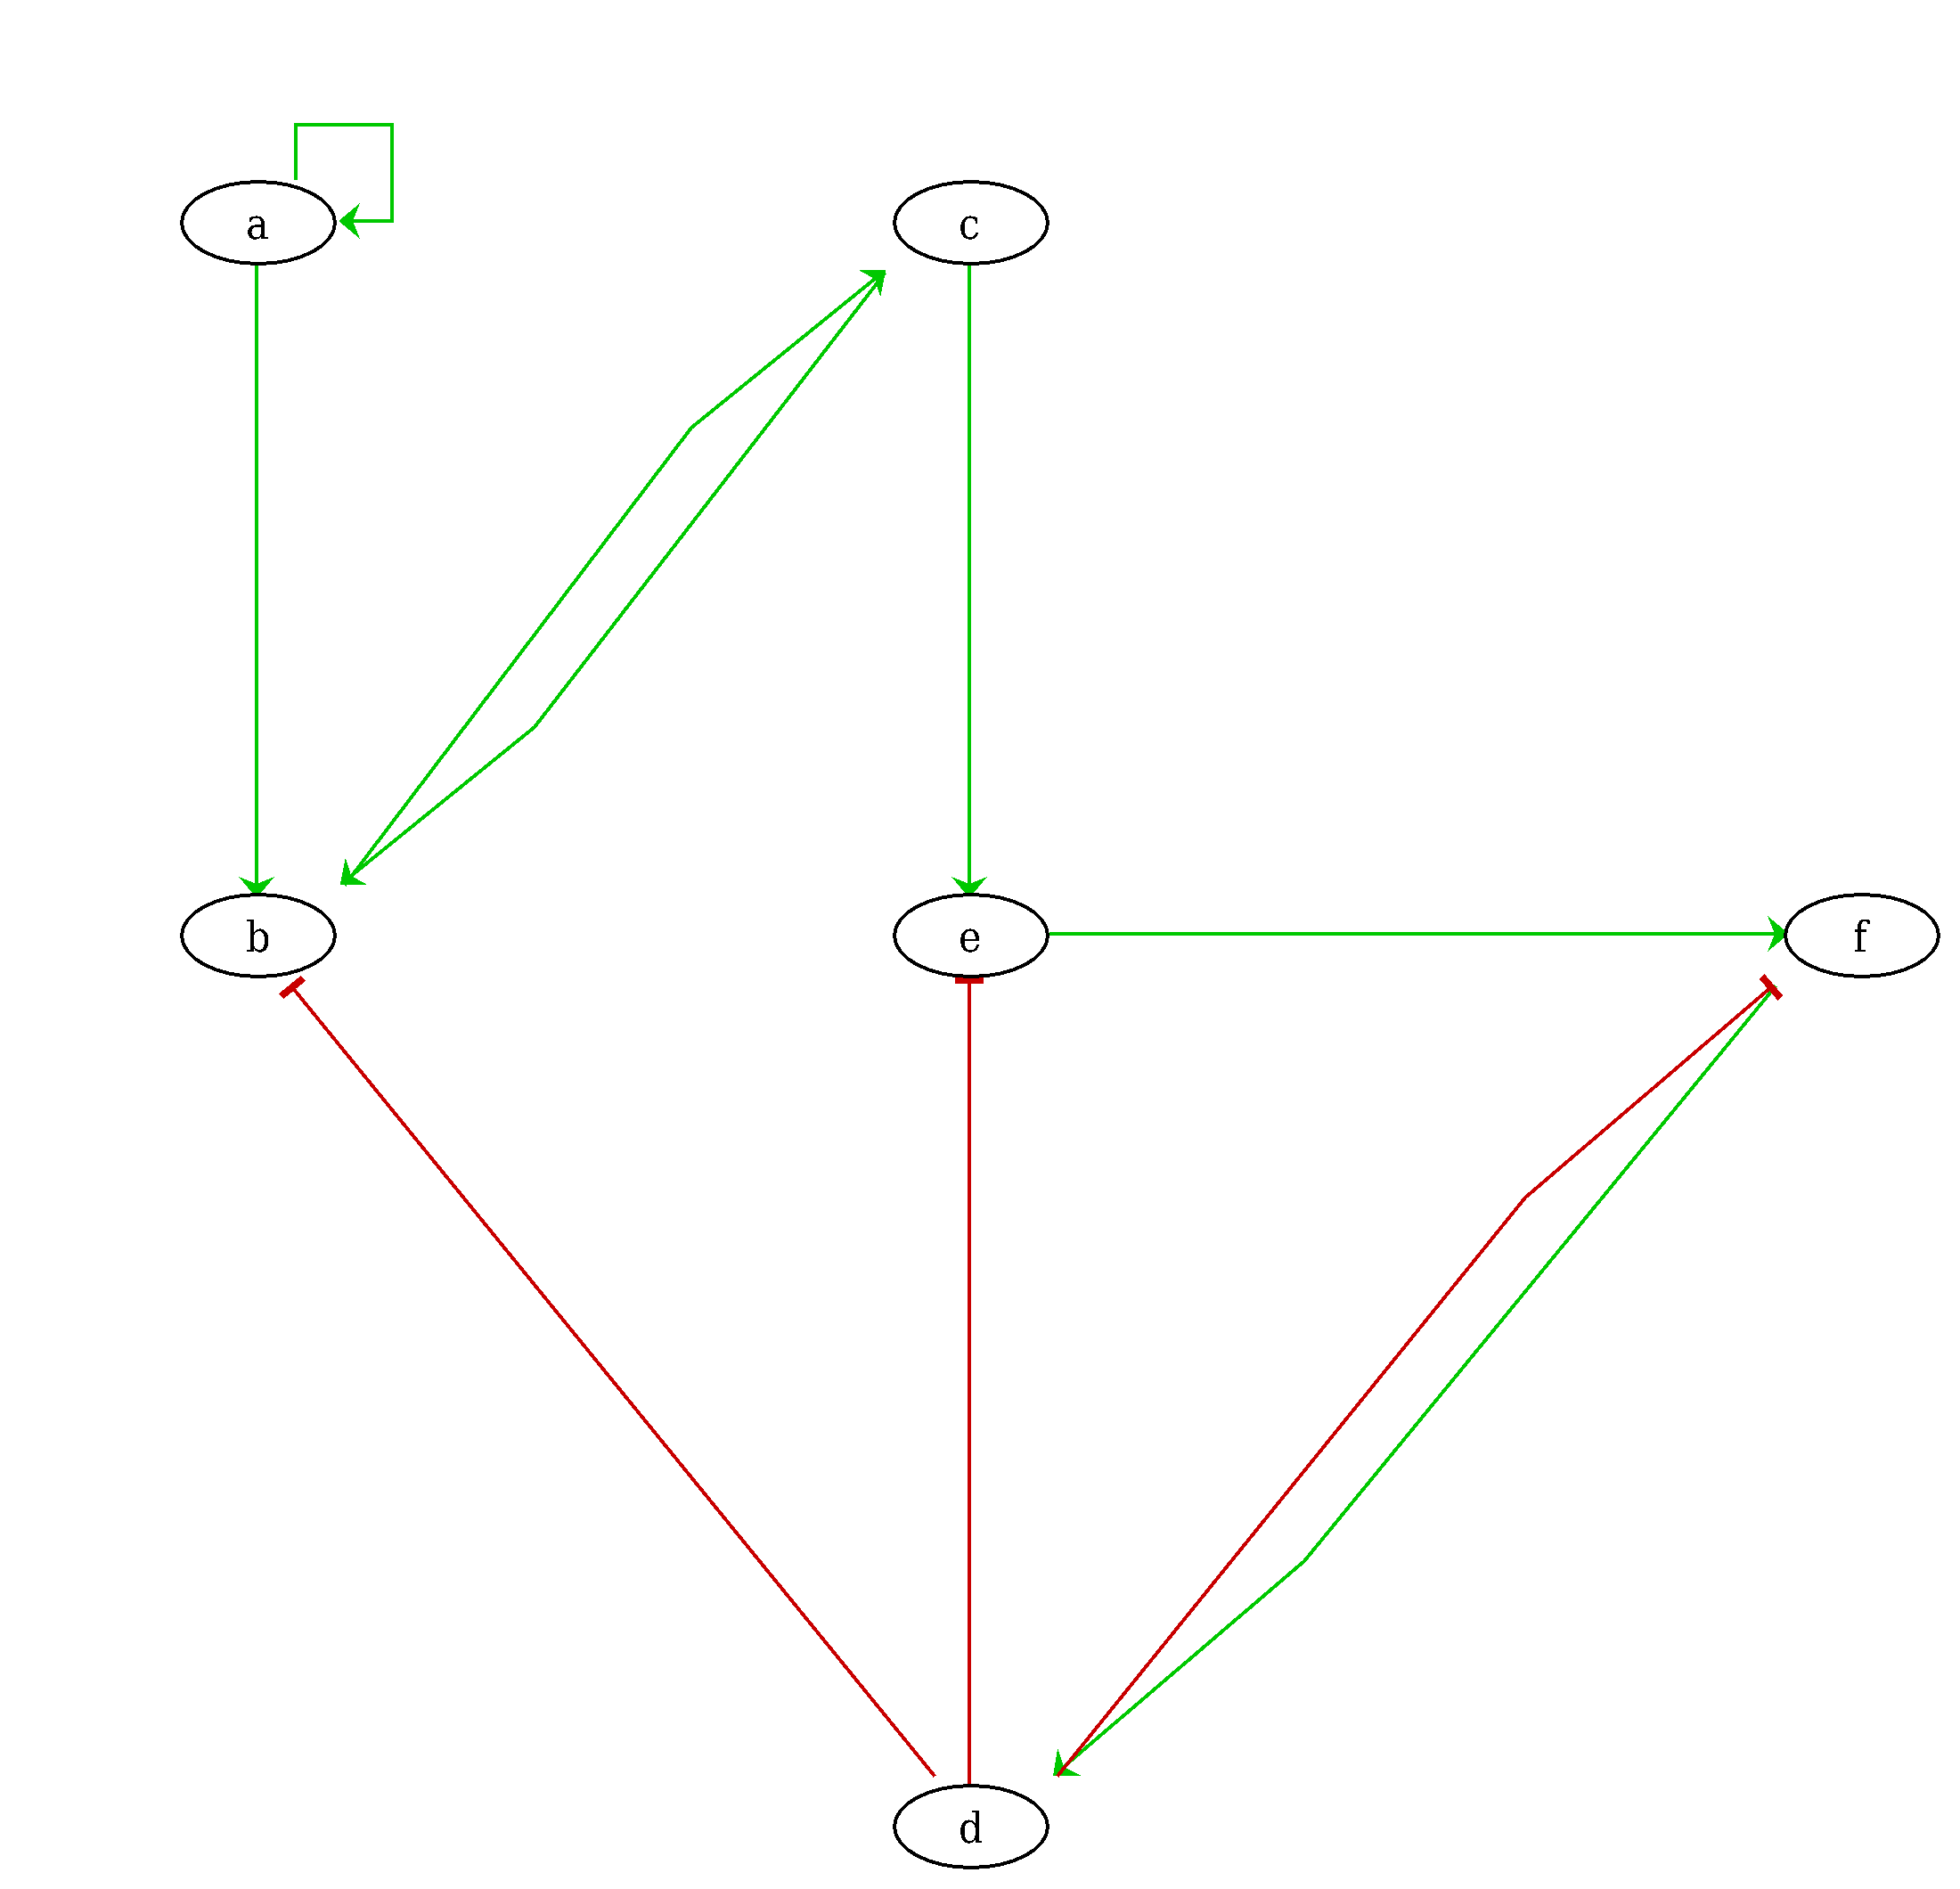

In [205]:
lrg = ginsim.load("model_with_coordinates.ginml")
ginsim.show(lrg)

In [206]:
fps = biolqm.fixpoints(lqm)
pd.DataFrame(fps)

a  b  c  d  e  f
0  0  0  0  0  0  0

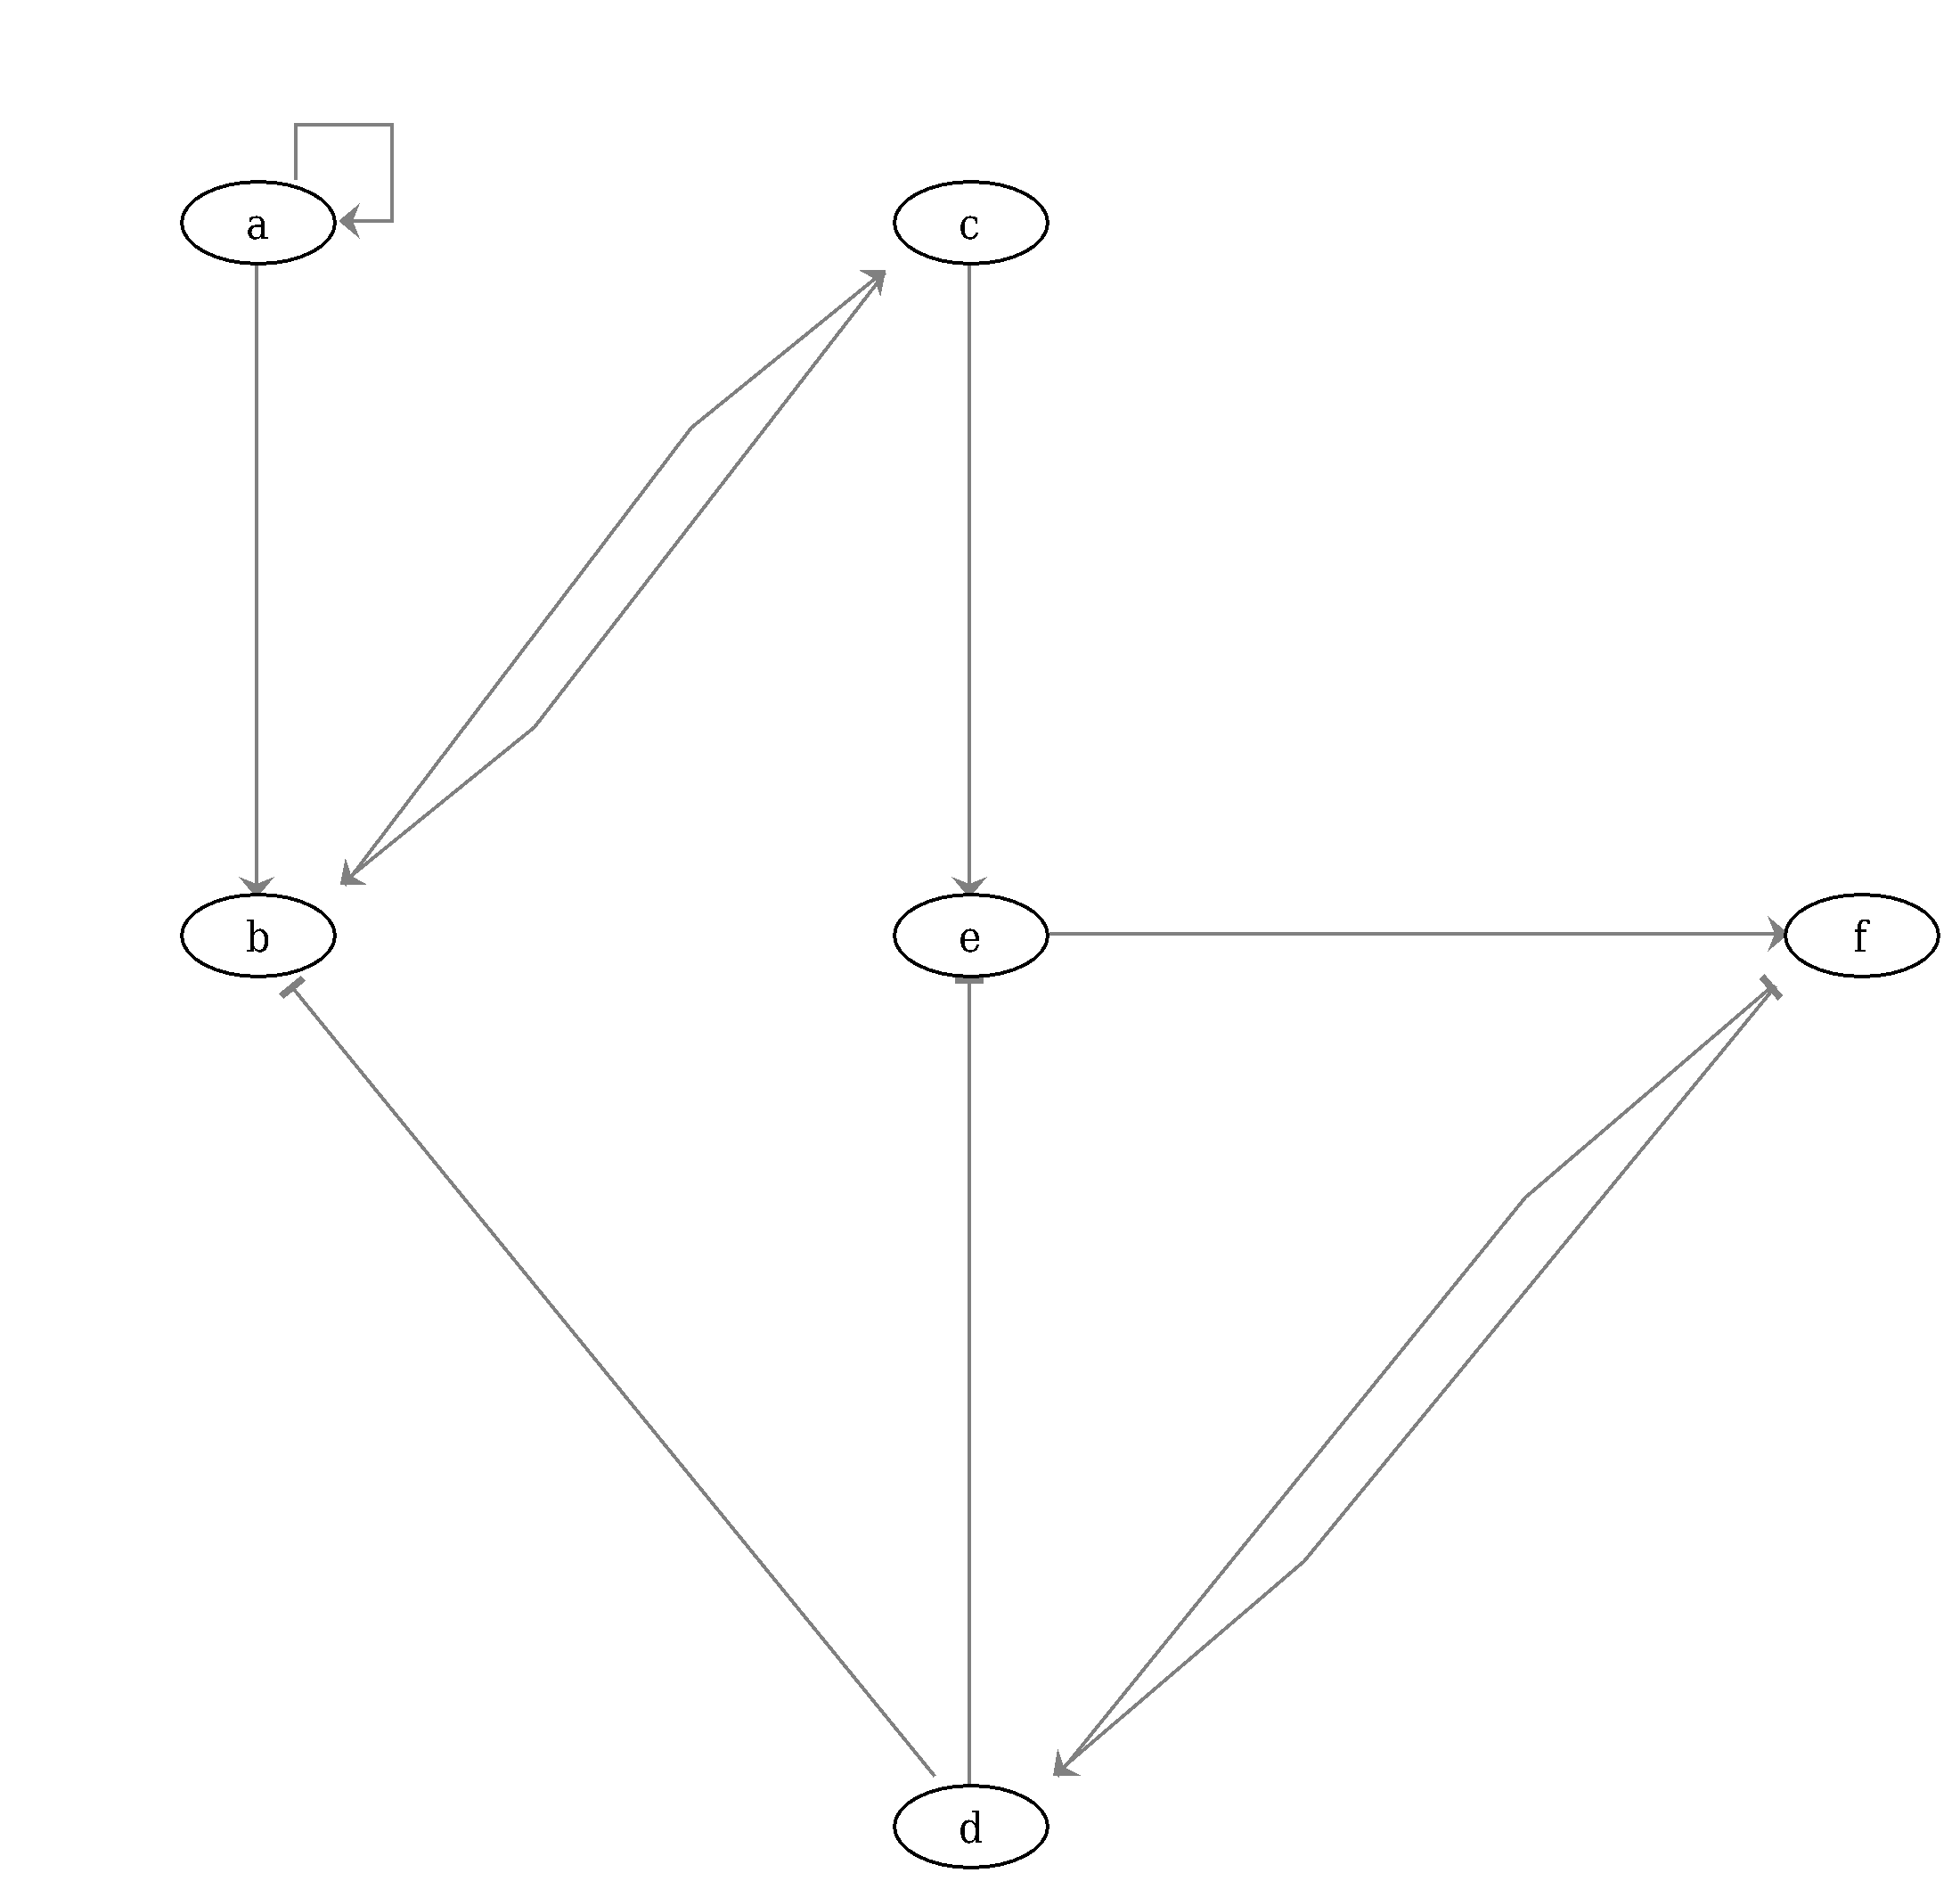

In [212]:
ginsim.show(lrg, fps[0])

In [314]:
Q = BooleanNetwork()

In [315]:
luxR, luxR_AI, luxR_AI_gen, luxI, AI = Q.vars("luxR", "luxR_AI", "luxR_AI_gen", "luxI", "AI")

In [316]:
Q[luxI] = luxR_AI_gen
Q[luxR_AI_gen] = luxR_AI
Q[luxR] = ~ luxR_AI_gen | (luxR_AI_gen & luxR)
Q[luxR_AI] = luxR & AI
Q[AI] = luxI

In [317]:
Q

AI <- luxI
luxI <- luxR_AI_gen
luxR <- !luxR_AI_gen|(luxR_AI_gen&luxR)
luxR_AI <- luxR&AI
luxR_AI_gen <- luxR_AI

In [319]:
lqm = Q.to_biolqm()
biolqm.save(lqm, "quorum.ginml", "ginml")

'quorum.ginml'

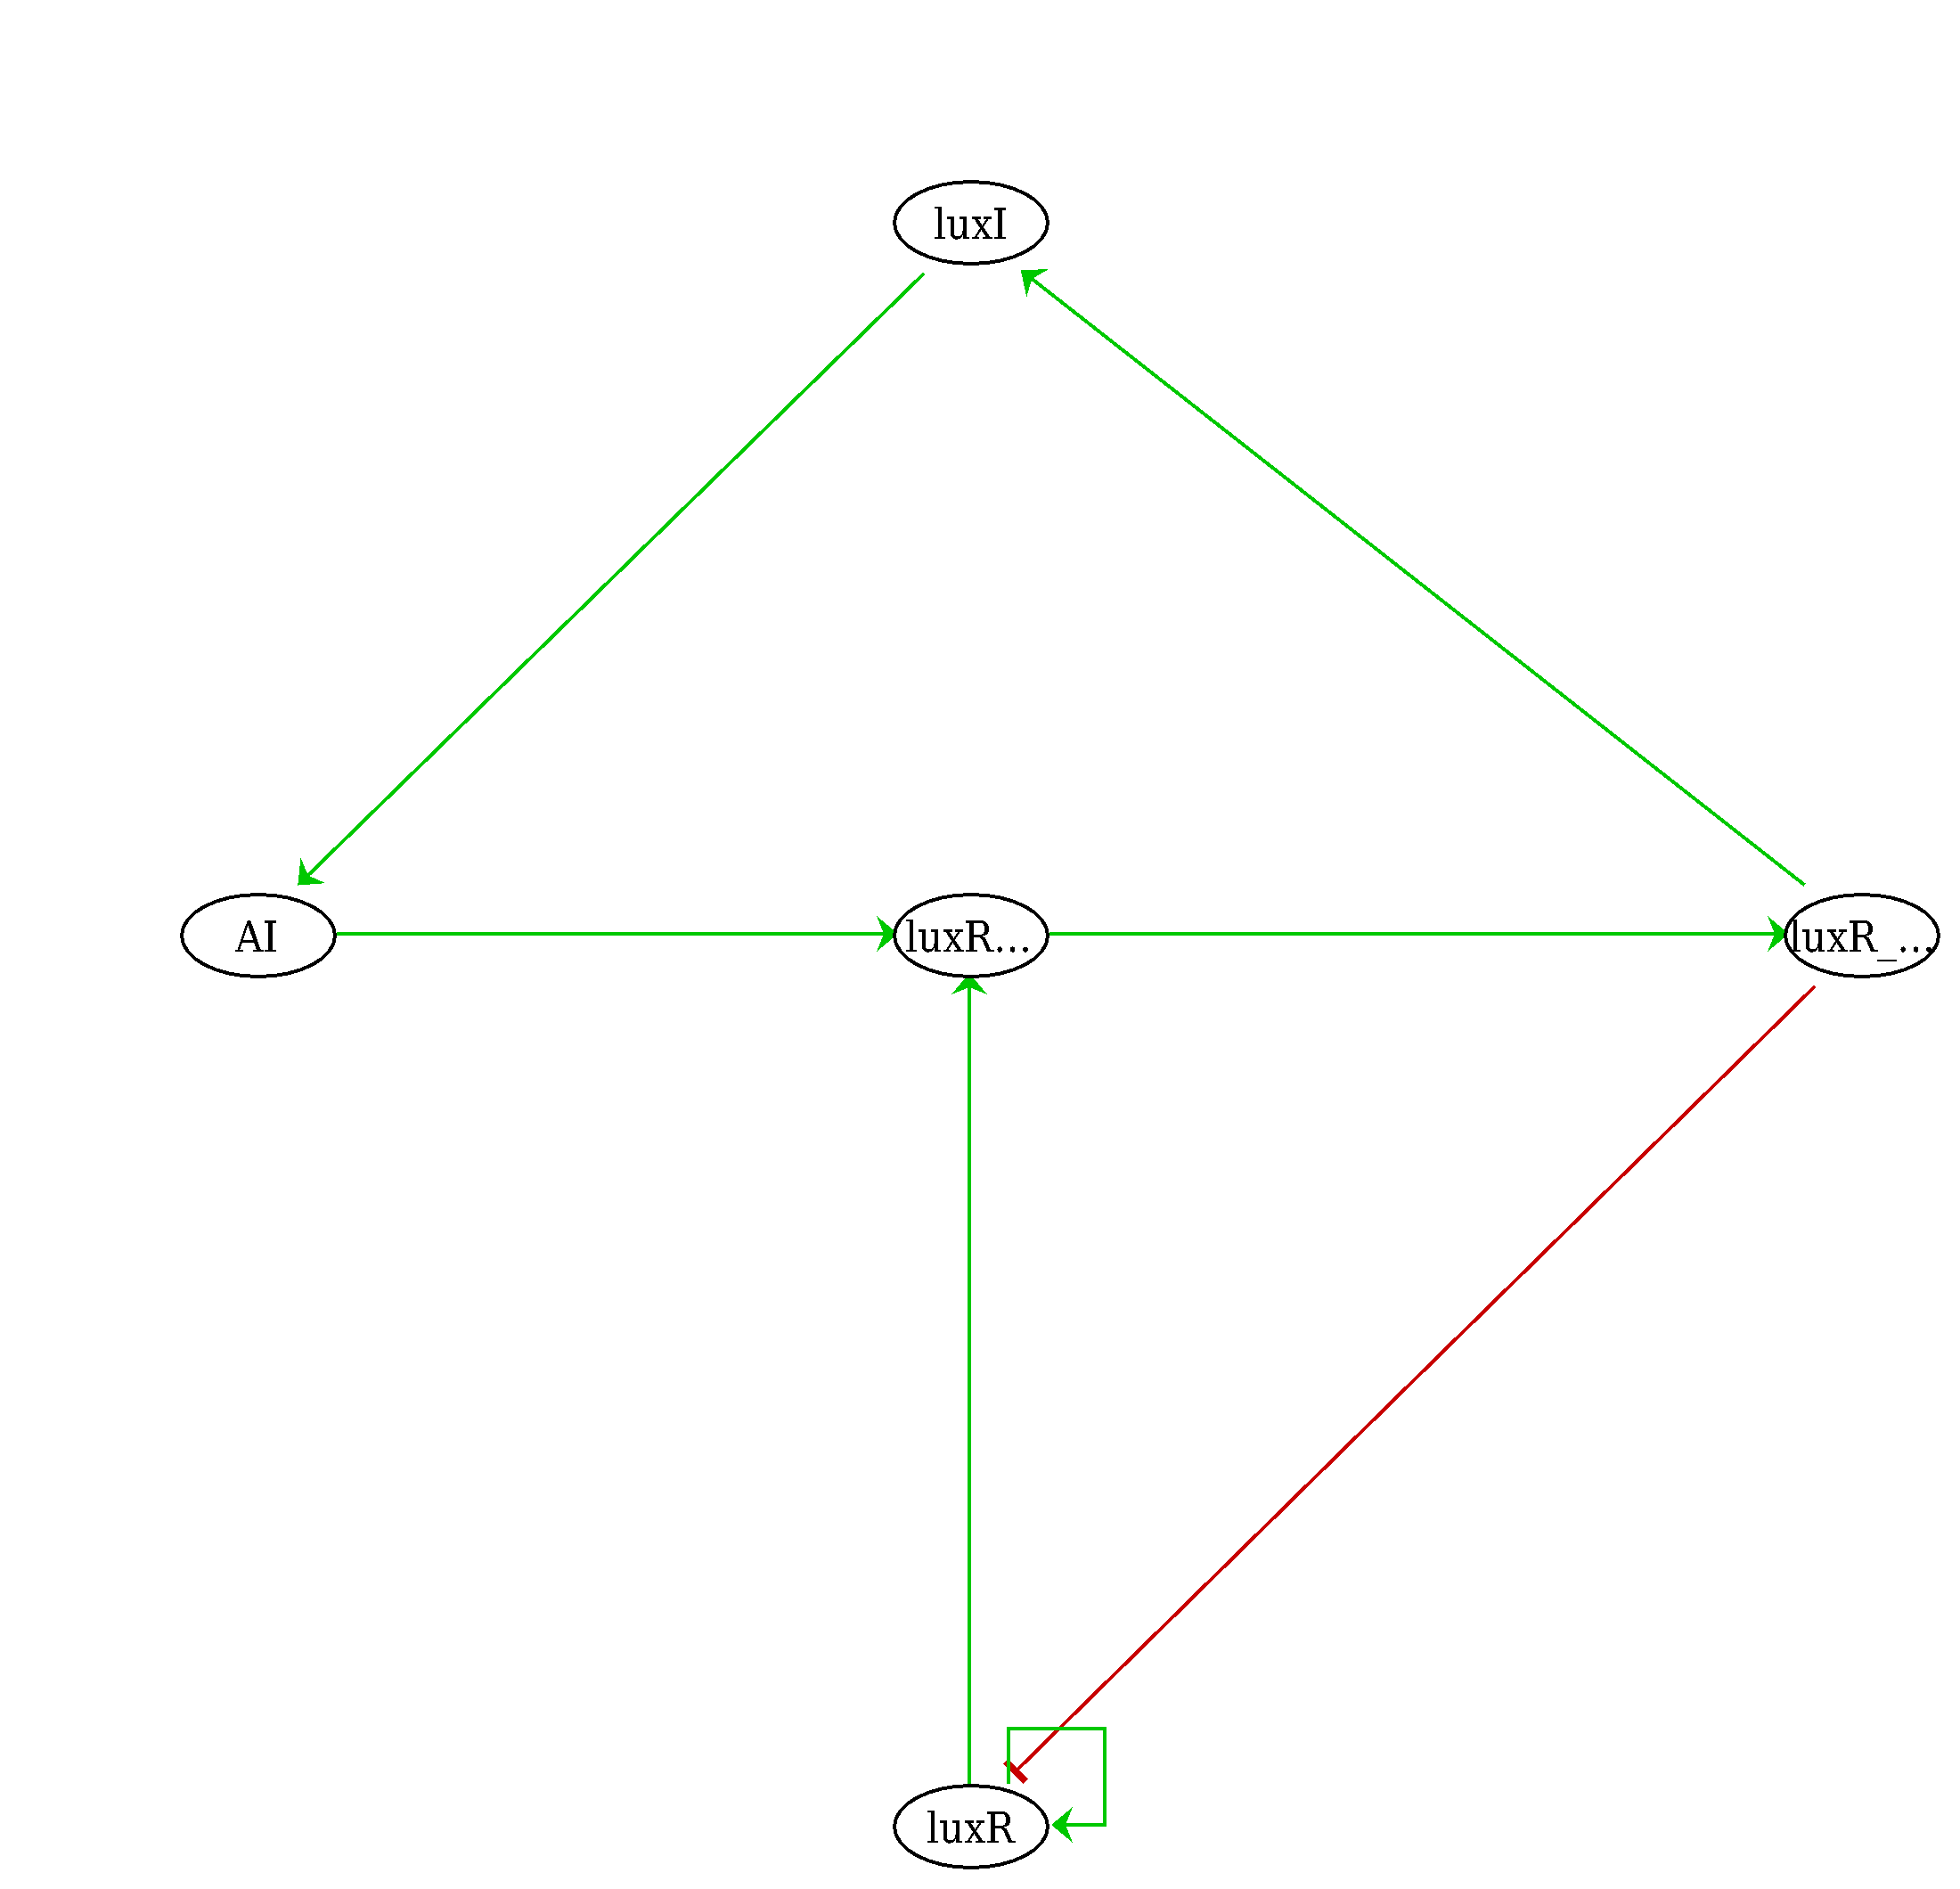

In [322]:
lrg = ginsim.load("quorum_with_coordinates.ginml")
ginsim.show(lrg)